In [50]:
import pandas as pd 
import numpy as np
import folium
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import Imputer
import seaborn as sns
import statsmodels.api as sm
sns.set(style = "white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')
from folium import plugins
from folium.plugins import HeatMap
import os
import json
import requests
import branca

In [51]:
idr_df= pd.read_csv('tmp5kbon6z6.csv')

In [ ]:
idr_df['Lat'] = idr_df.Lat.fillna(42)
idr_df['Long'] = idr_df.Long.fillna(-71)
idr_df['Lat']= idr_df.Lat.replace(40, 42.35)
idr_df['Long'] = idr_df.Long.replace(-72, -71)
idr_df['Lat']= idr_df.Lat.replace(42, 42.35)

In [5]:
offense_types= idr_df.OFFENSE_CODE_GROUP.unique()

# total Offences group reports

In [6]:
offences = idr_df.groupby('OFFENSE_CODE_GROUP').apply(lambda x: len(x))
offences= offences.reset_index(name = 'total_reports')
offences['reports_percentage']= (offences.total_reports / offences.total_reports.sum())*100

Text(0.5, 1.0, 'Offense Code Group')

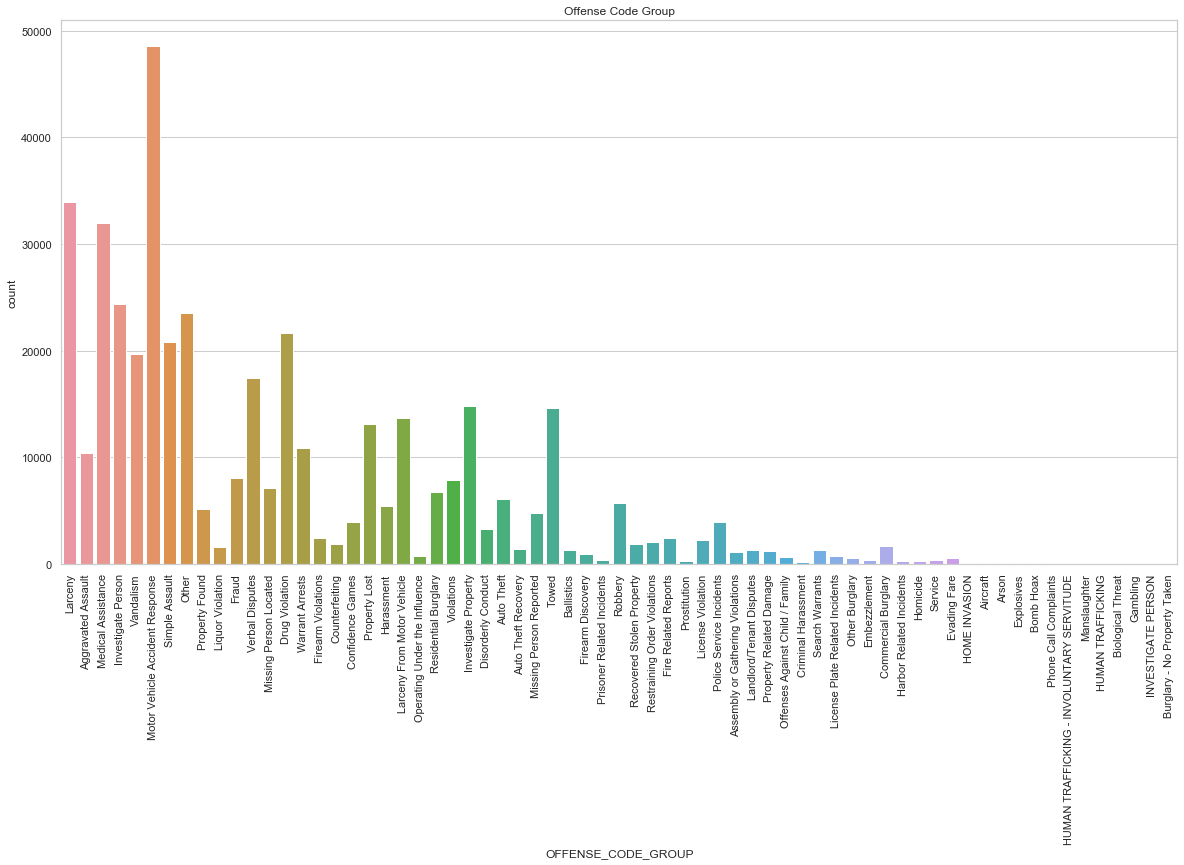

In [11]:
plt.figure(figsize=(20, 10))
p = sns.countplot(idr_df['OFFENSE_CODE_GROUP'])
# p.set_xticklabels(rotation=30)
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.title('Offense Code Group')

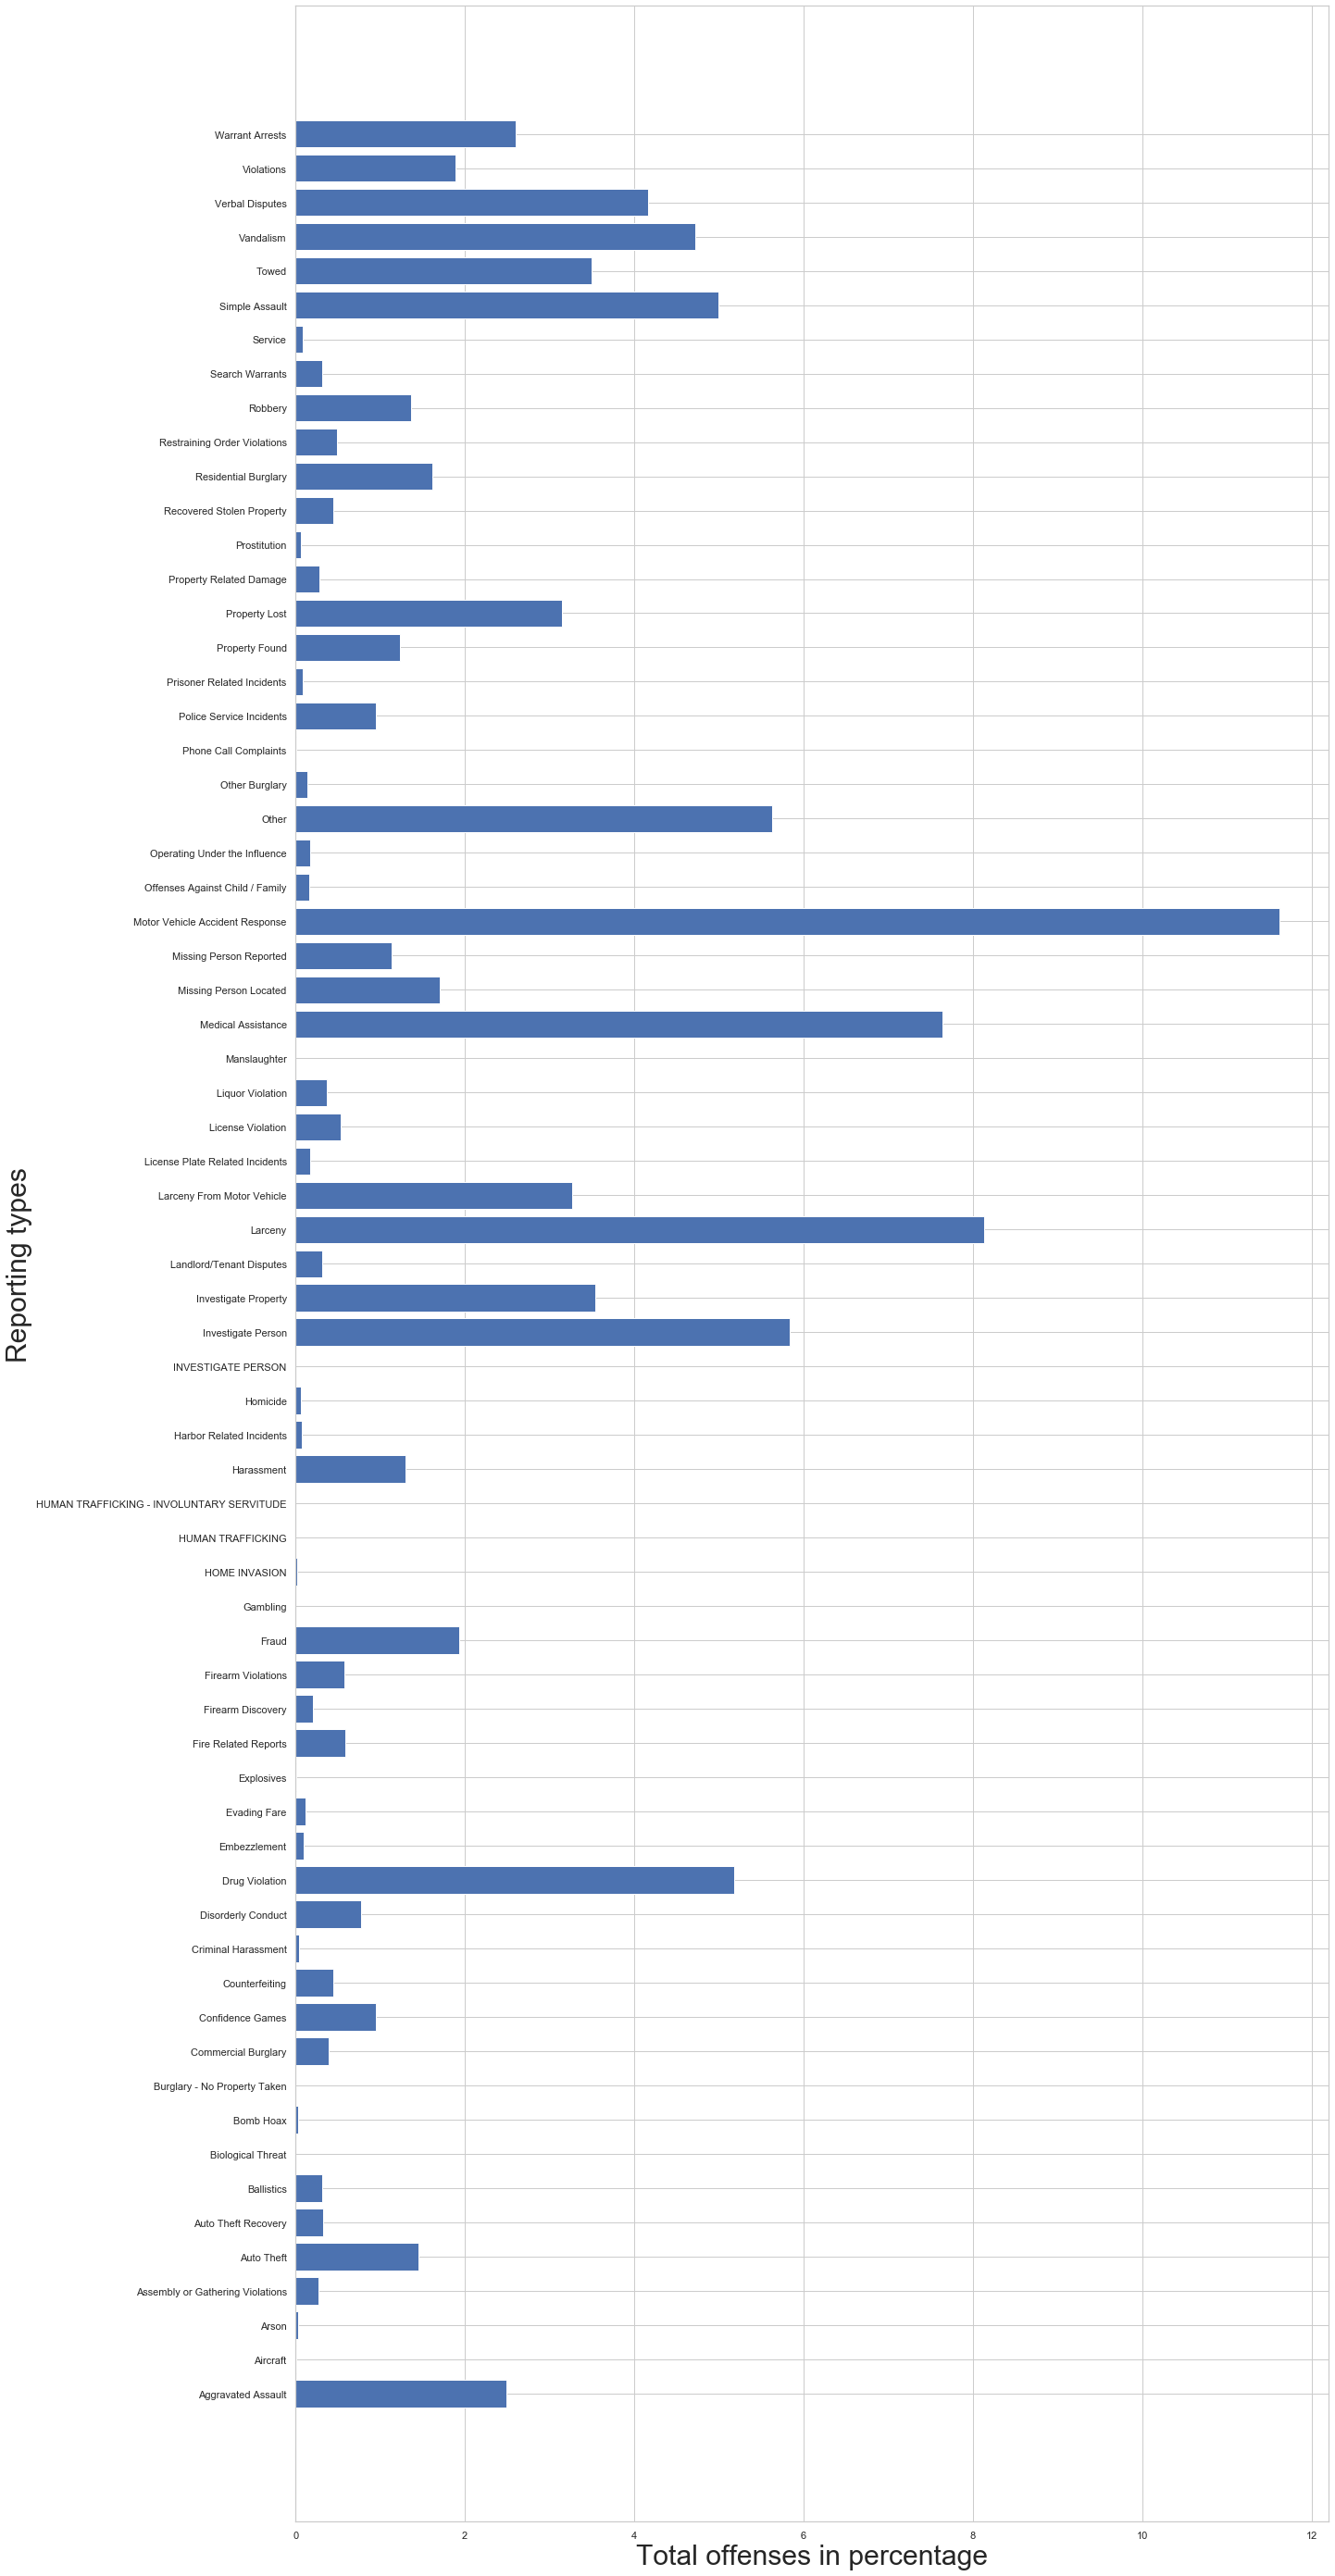

In [7]:
plt.rcParams["figure.figsize"] = (20,50)
plt.barh(offences.OFFENSE_CODE_GROUP, offences.reports_percentage)
plt.xlabel('Total offenses in percentage', fontsize=30)
plt.ylabel('Reporting types', fontsize=30)
plt.rcParams["figure.figsize"] = (20,10)

# Yearly Offenses reports

In [88]:
year_total_offences= idr_df.groupby('YEAR').apply(lambda x: len(x.OFFENSE_CODE_GROUP))
year_total_offences = year_total_offences.reset_index(name= 'total_offenses')

Text(0, 0.5, 'frequency')

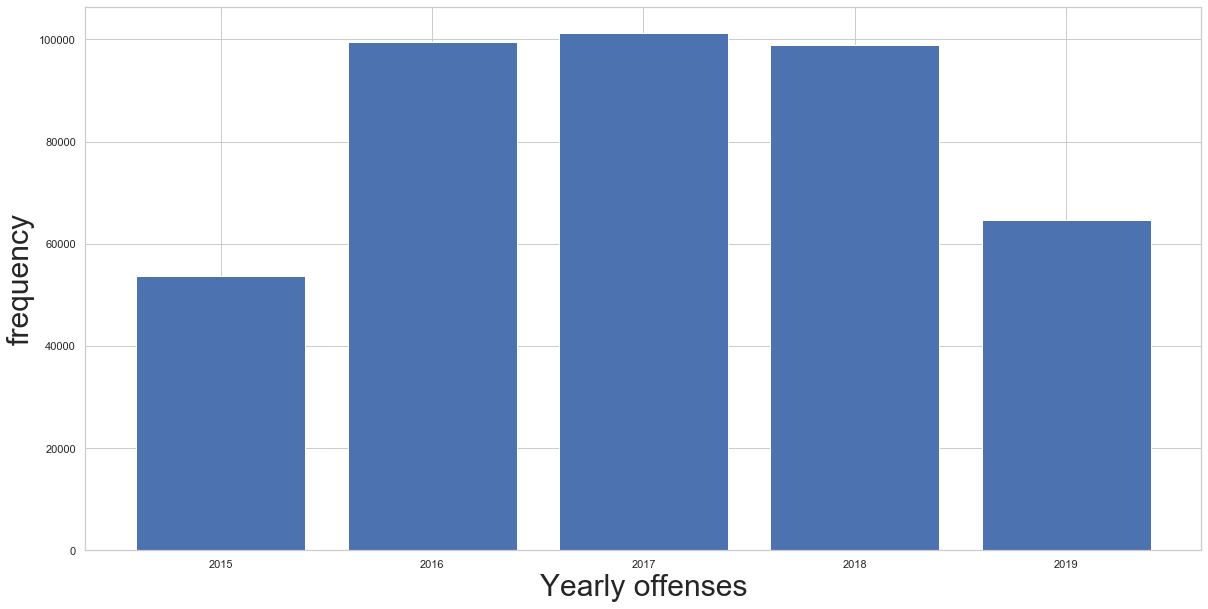

In [89]:
plt.bar(year_total_offences.YEAR, year_total_offences.total_offenses)
plt.xlabel('Yearly offenses', fontsize=30)
plt.ylabel('frequency', fontsize=30)

In [91]:
year_total_offences

,YEAR,total_offenses
0,2015,53595
1,2016,99416
2,2017,101322
3,2018,98814
4,2019,64587


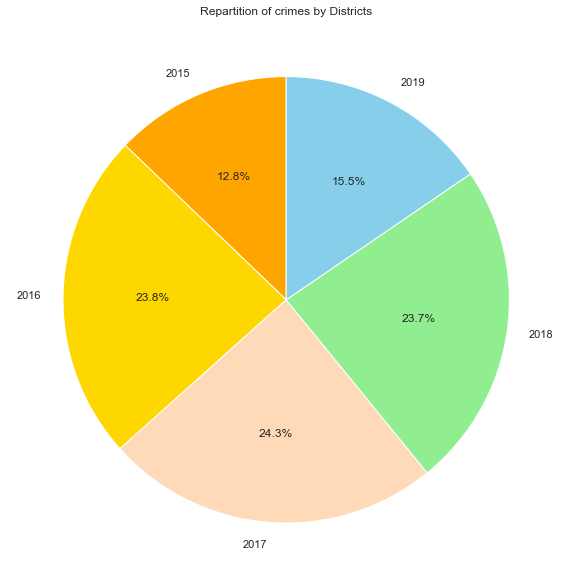

In [94]:
plt.figure(figsize=(10,20))
colors=['orange','gold','peachpuff','lightgreen','skyblue']
plt.pie(year_total_offences.total_offenses, labels=year_total_offences.YEAR, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Repartition of crimes by Districts')
plt.show()

# Robbery 

In [23]:
Robbery = idr_df[idr_df.OFFENSE_CODE_GROUP == 'Robbery']
Robbery.head()

In [11]:
Hourly_total_offences= Robbery.groupby('HOUR').apply(lambda x: len(x.OFFENSE_CODE_GROUP))

In [12]:
Hourly_total_offences = Hourly_total_offences.reset_index(name= 'total_offenses')

Text(0, 0.5, 'frequency')

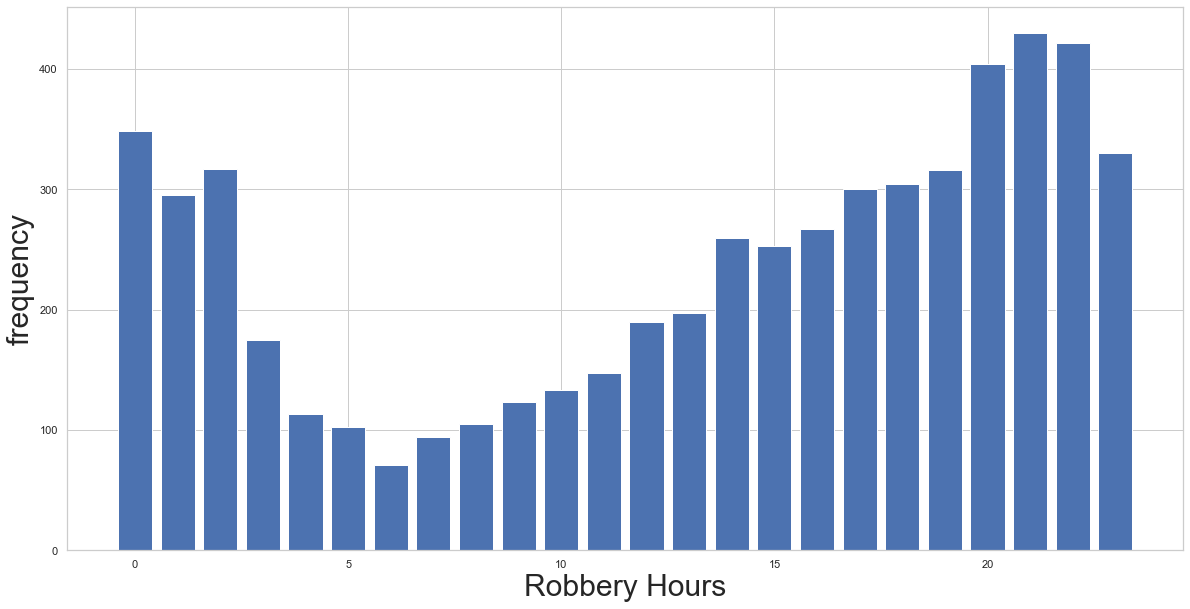

In [13]:
plt.bar(Hourly_total_offences.HOUR, Hourly_total_offences.total_offenses)
plt.xlabel('Robbery Hours', fontsize=30)
plt.ylabel('frequency', fontsize=30)

# Year and Offences group reports

In [14]:
total_year_offences= idr_df.groupby(['YEAR', 'OFFENSE_CODE_GROUP']).apply(lambda x: len(x))

In [15]:
total_year_offences = total_year_offences.reset_index(name="total_offenses")

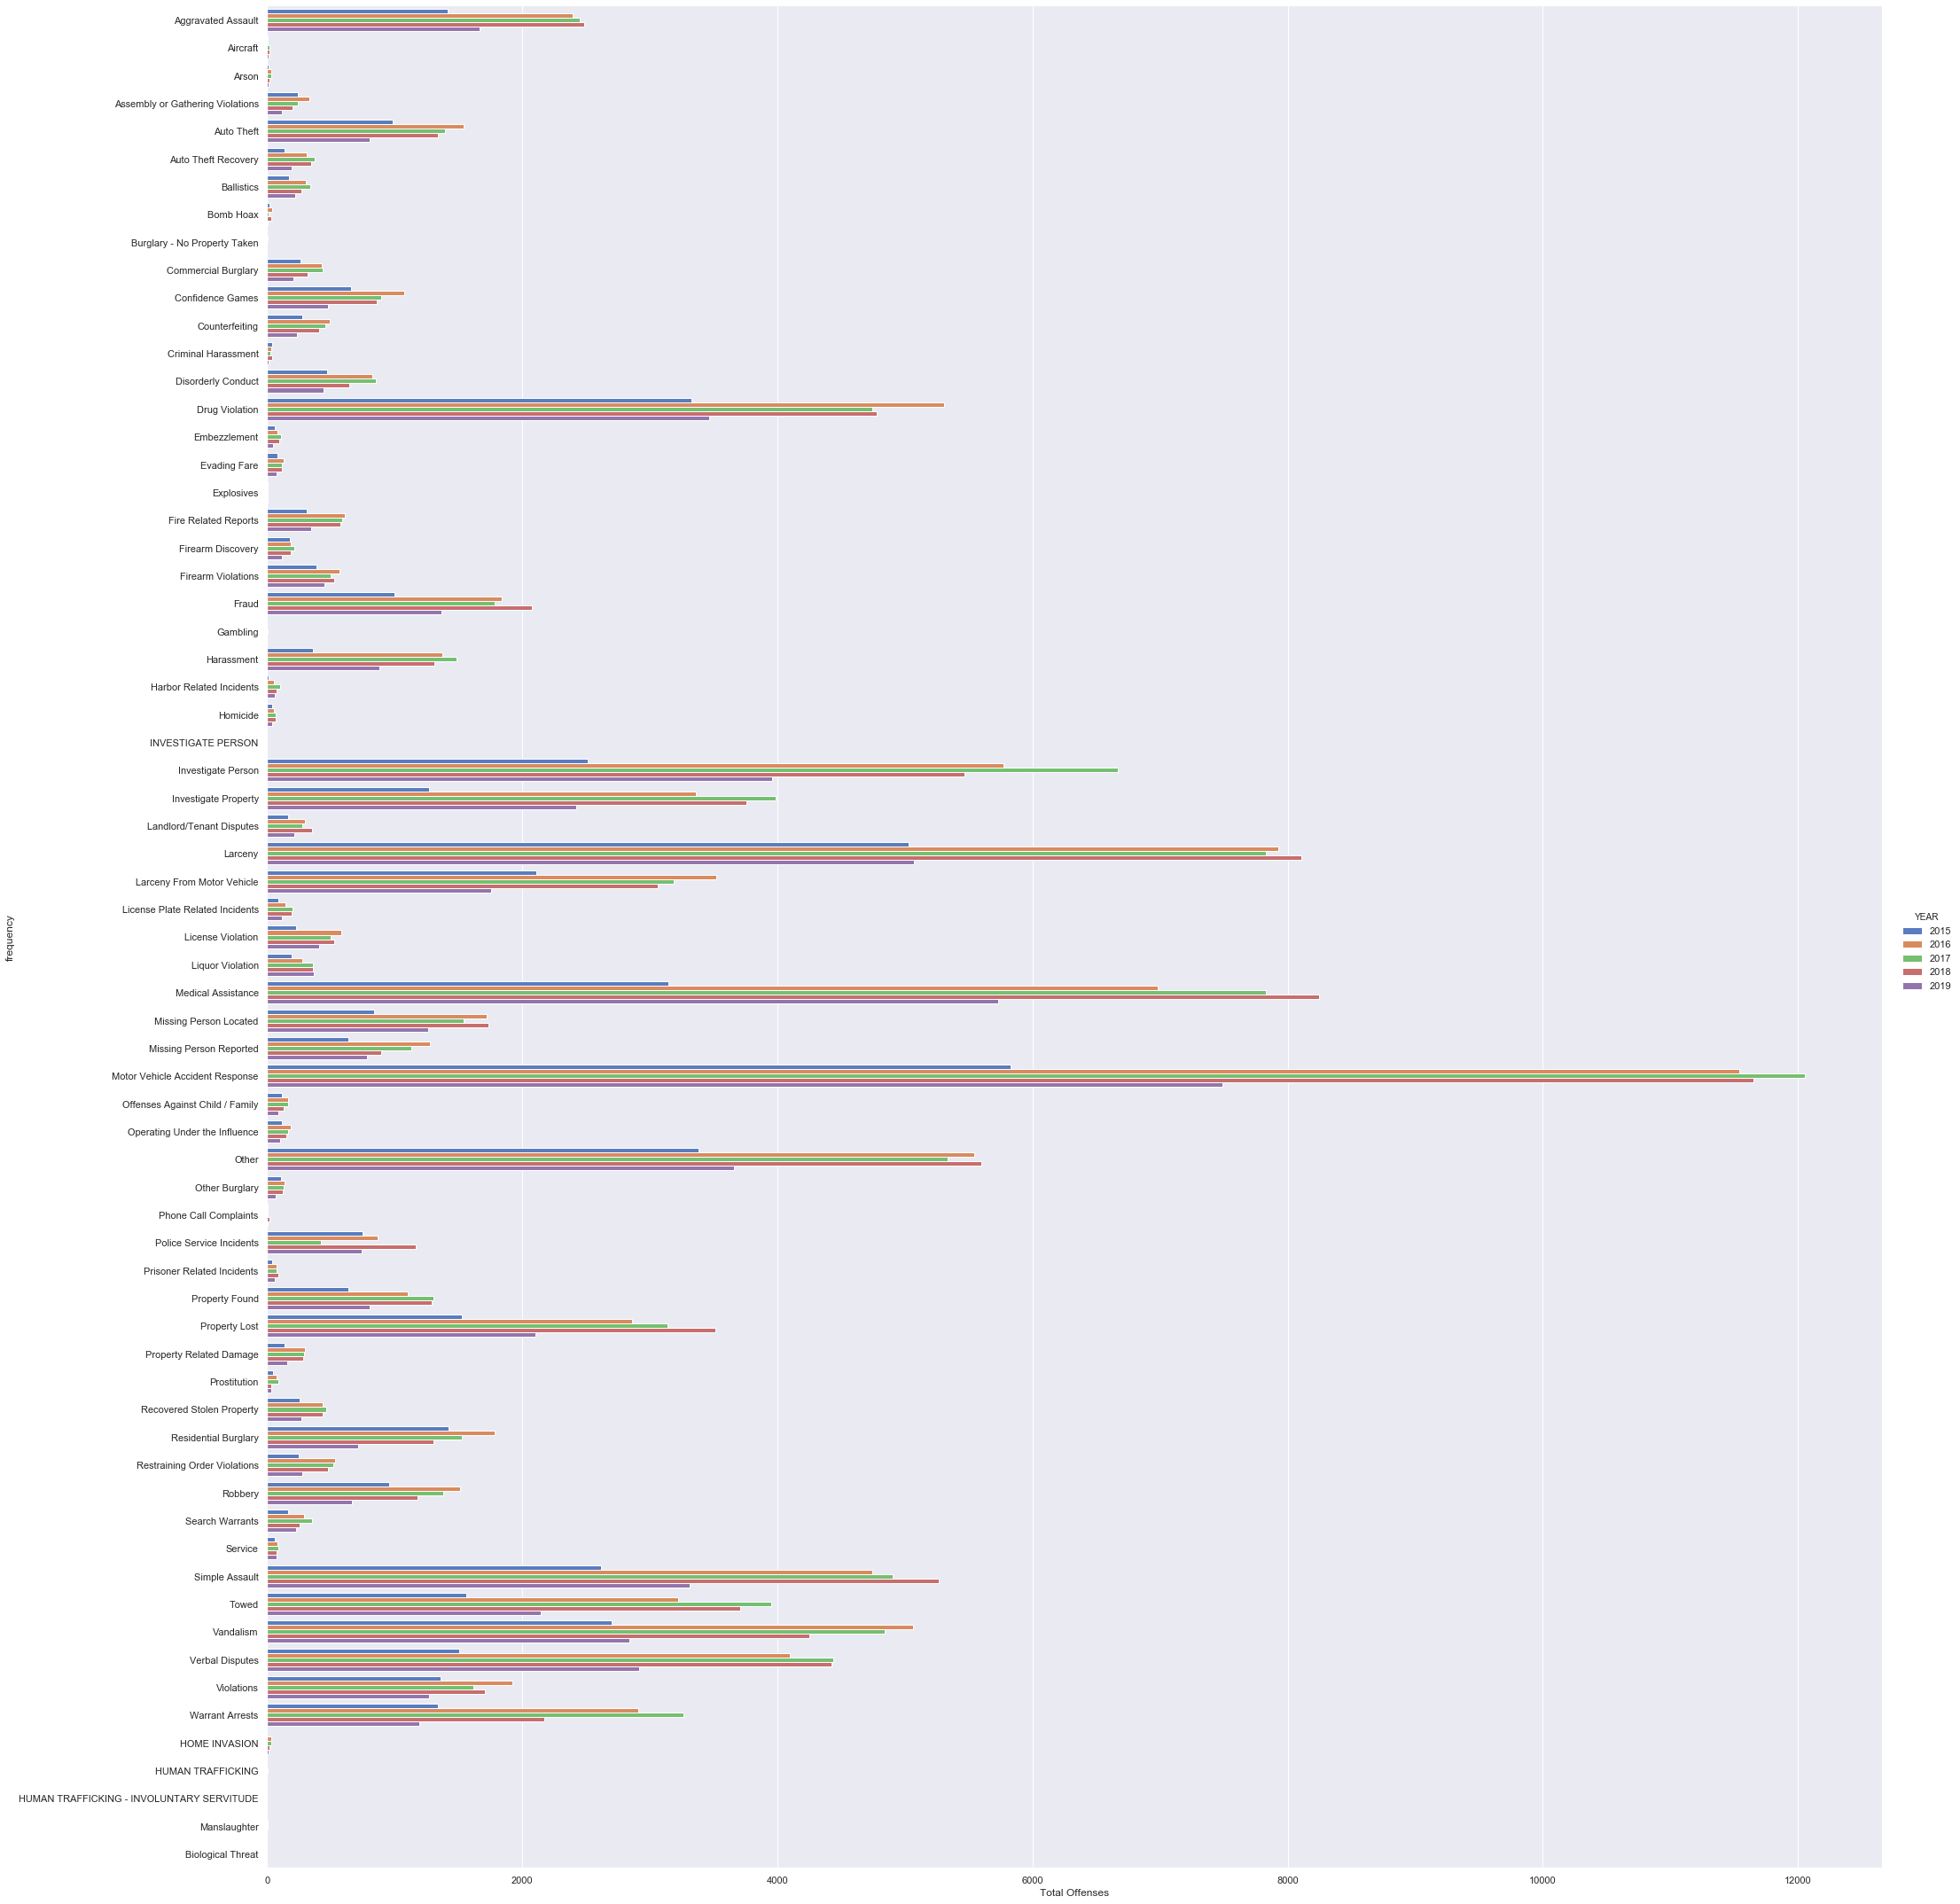

In [60]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,50)})
# Draw a nested barplot to show offenses reports yearly comparasion
g = sns.catplot(x="total_offenses", y="OFFENSE_CODE_GROUP", hue="YEAR", data=total_year_offences, height=30,kind="bar", palette="muted")
# g.despine(left=True)
g.set_xlabels("Total Offenses")
g.set_ylabels("frequency")

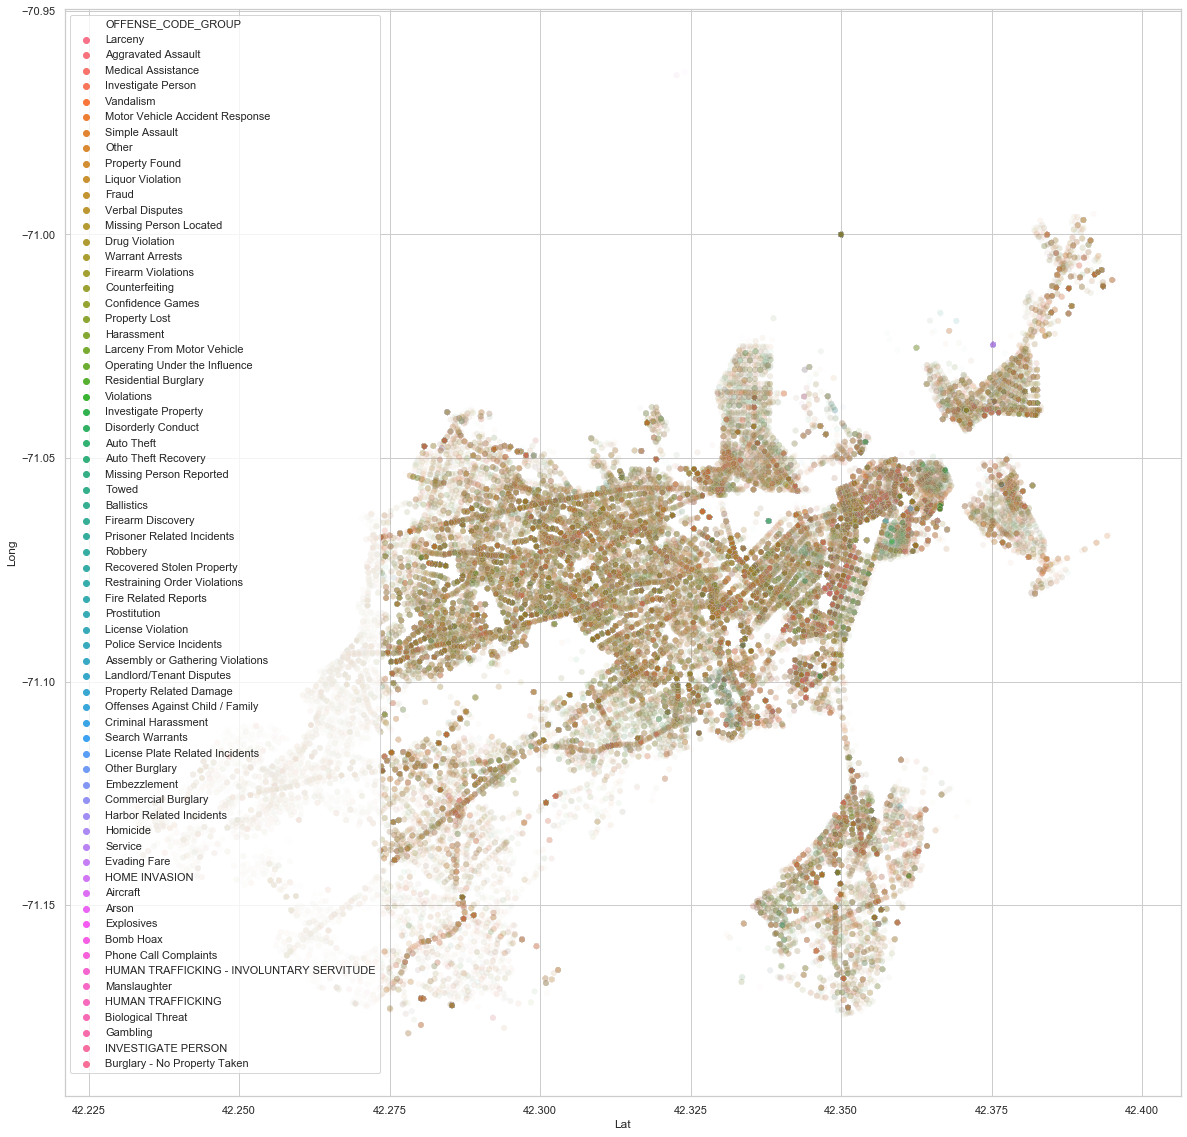

In [83]:
plt.figure(figsize=(20, 20))
p = sns.scatterplot(x='Lat', y='Long', hue='OFFENSE_CODE_GROUP',alpha=0.02, data=idr_df)

# Year, Week Days and Offences group reports

In [17]:
offenses_by_WeekDays= idr_df.groupby(['YEAR', 'DAY_OF_WEEK', 'OFFENSE_CODE_GROUP']).apply(lambda x: len(x))

In [18]:
offenses_by_WeekDays= offenses_by_WeekDays.reset_index(name ='total_offenses')

In [19]:
# offenses_by_WeekDays[offenses_by_WeekDays.OFFENSE_CODE_GROUP == offense_types[0]]

,YEAR,DAY_OF_WEEK,OFFENSE_CODE_GROUP,total_offenses
25,2015,Friday,Larceny,777
84,2015,Monday,Larceny,728
143,2015,Saturday,Larceny,632
199,2015,Sunday,Larceny,572
258,2015,Thursday,Larceny,735
317,2015,Tuesday,Larceny,788
373,2015,Wednesday,Larceny,798
433,2016,Friday,Larceny,1196
493,2016,Monday,Larceny,1164
552,2016,Saturday,Larceny,1109


# Serious crimes occurs at 

In [12]:
seriouis_offenses_time= idr_df.groupby('HOUR').apply(lambda x: len(x.OFFENSE_CODE_GROUP))

In [13]:
seriouis_offenses_time = seriouis_offenses_time.reset_index(name= 'total_offenses')

Text(0, 0.5, 'frequency')

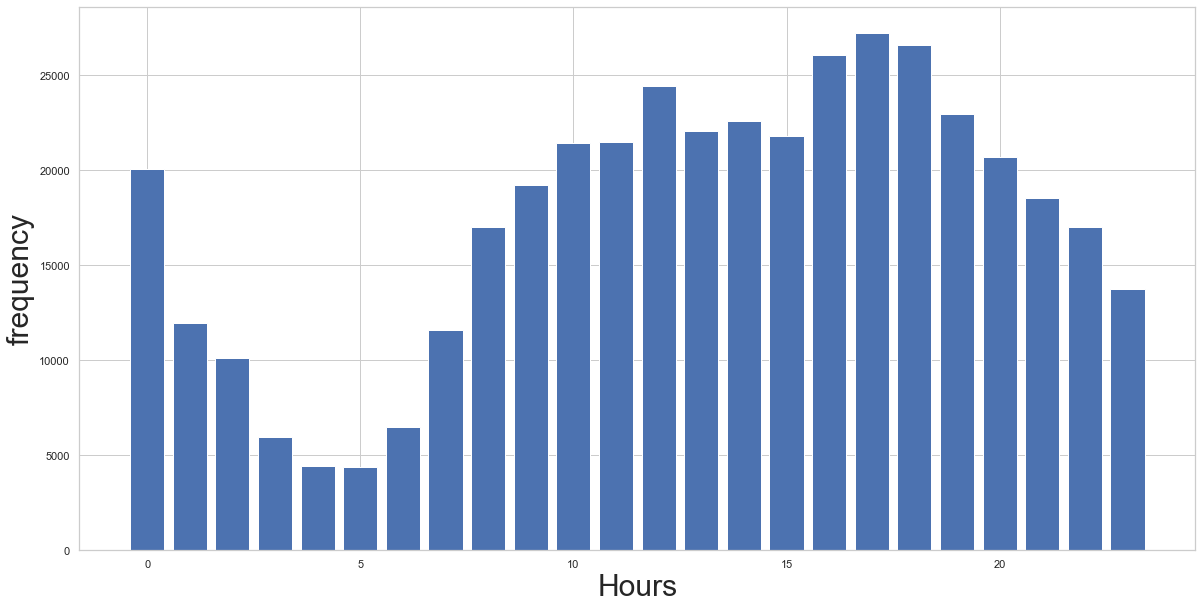

In [17]:
plt.bar(seriouis_offenses_time.HOUR, seriouis_offenses_time.total_offenses)
plt.xlabel('Hours', fontsize=30)
plt.ylabel('frequency', fontsize=30)

# offenses by week days 

In [19]:
seriouis_offenses_weekdays= idr_df.groupby('DAY_OF_WEEK').apply(lambda x: len(x.OFFENSE_CODE_GROUP))

In [20]:
seriouis_offenses_weekdays = seriouis_offenses_weekdays.reset_index(name= 'total_offenses')

Text(0, 0.5, 'frequency')

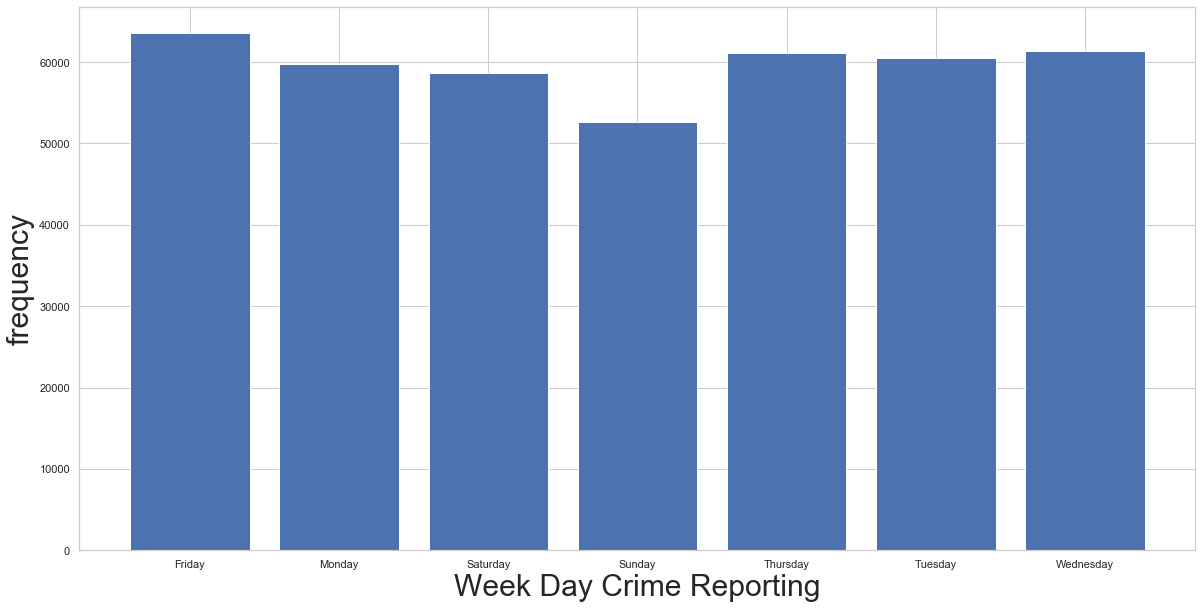

In [21]:
plt.bar(seriouis_offenses_weekdays.DAY_OF_WEEK, seriouis_offenses_weekdays.total_offenses)
plt.xlabel('Week Day Crime Reporting', fontsize=30)
plt.ylabel('frequency', fontsize=30)

# District offenses

In [158]:
distict_reports= idr_df.groupby('DISTRICT').apply(lambda x: len(x))
distict_reports = distict_reports.reset_index(name ='total_offenses')
distict_reports['percentage']= (distict_reports.total_offenses/sum(distict_reports.total_offenses))*100

Text(0, 0.5, 'Frequency in percentage')

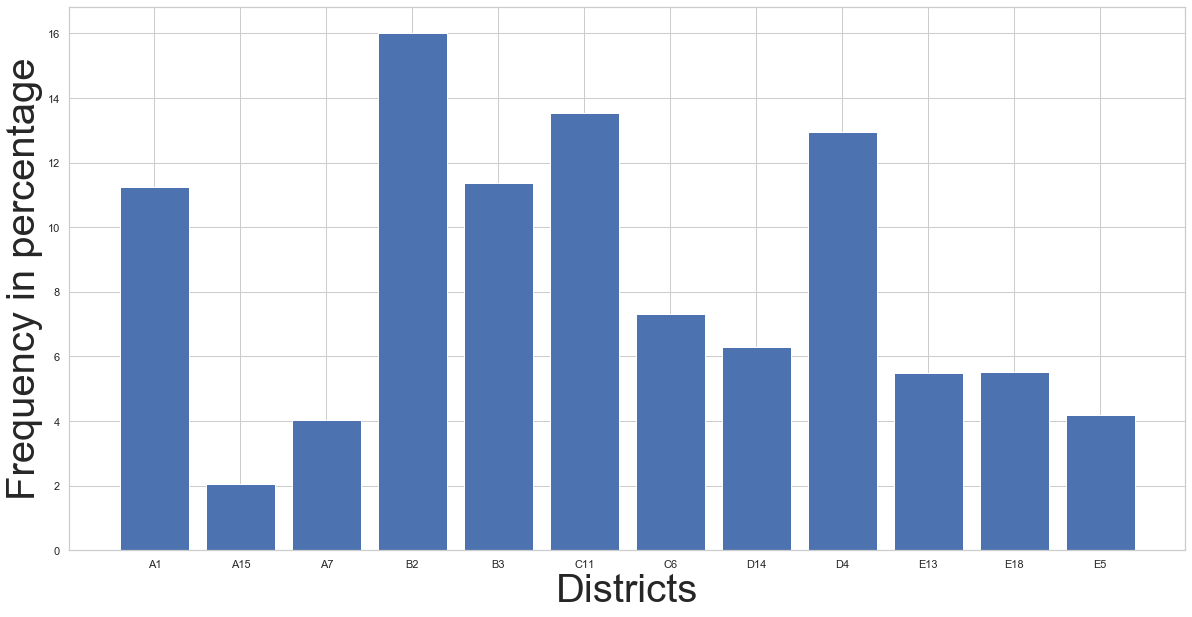

In [159]:
plt.bar(distict_reports.DISTRICT, distict_reports.percentage)
plt.xlabel('Districts', fontsize=40)
plt.ylabel('Frequency in percentage', fontsize=40)

In [266]:
disttict_offenses_code= idr_df.groupby(['DISTRICT' , 'OFFENSE_CODE_GROUP']).apply(lambda x: len(x))

In [267]:
disttict_offenses_code =disttict_offenses_code.reset_index(name ='total_offenses')

In [268]:
disttict_offenses_code

,DISTRICT,OFFENSE_CODE_GROUP,total_offenses
0,0,Aggravated Assault,31
1,0,Aircraft,1
2,0,Assembly or Gathering Violations,6
3,0,Auto Theft,28
4,0,Auto Theft Recovery,12
5,0,Ballistics,5
6,0,Commercial Burglary,3
7,0,Confidence Games,7
8,0,Counterfeiting,3
9,0,Disorderly Conduct,5


In [30]:
Date_df = idr_df.groupby('OCCURRED_ON_DATE').apply(lambda x: len(x.OFFENSE_CODE_GROUP))
Date_df= Date_df.reset_index(name ='counts')

In [ ]:
# plt.plot(Date_df.counts, Date_df.OCCURRED_ON_DATE, '-r')
# plt.xlabel('Occuered on Date', fontsize=40)
# plt.ylabel('Frequency', fontsize=40)

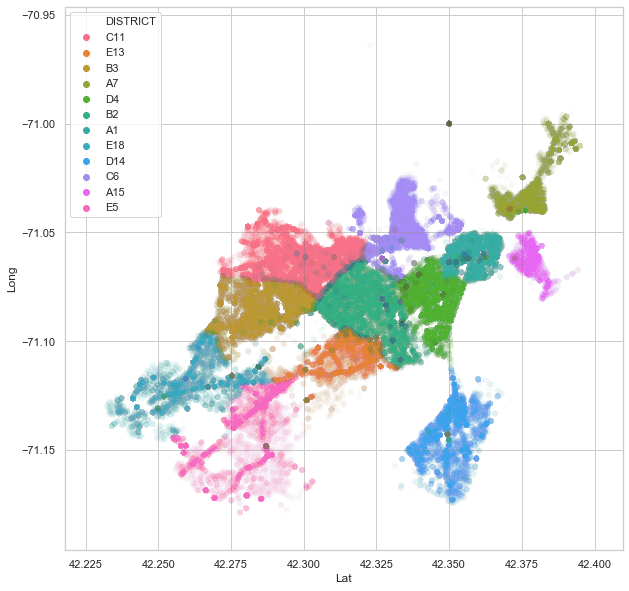

In [77]:
plt.figure(figsize=(10, 10))
p = sns.scatterplot(x='Lat', y='Long', hue='DISTRICT',alpha=0.01, data=idr_df)

In [8]:
data = idr_df[idr_df.YEAR == 2016]
idr_df=idr_df.fillna(0)
m = folium.Map(location=[42.320,-71.05], zoom_start=12,\
                control_scale = True, attr='USGS style')
m.add_children(plugins.HeatMap(zip(data.Lat, data.Long, data.YEAR), radius = 5))
m.save('data.html')